**Scottie YANG Miaoyi**

Fall 2021

CS 251: Data Analysis and Visualization

# Lab 2: Matrix Transformations, Numpy and MatPlotLib
## Task 1: Setup, data import and projection

### 1a) Setup
1. Import numpy
2. Import matplotlib.pyplot

In [3]:
# Header

import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams['font.size'] = 15
plt.rcParams["figure.figsize"] = [12,4.5]

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

### 1b) Projection
1. Read the toy dataset in 'data/gauss_3d.csv' using genfromtxt into a numpy matrix with 3 columns (X, Y, and Z). [numpy.genfromtxt](https://numpy.org/doc/1.18/reference/generated/numpy.genfromtxt.html)
2. Create a figure with 3 subplots, one for every possible combination of the dataset's dimensions (X vs Y, Y vs Z, and Z vs X). Each of these plots shows a different 2D __projection__ of the 3D dataset (each column is a different dimension). 
  - Remember pyplot? [pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py) 
  - Remember subplots?  [pyplot.subplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) 
  
3. Make sure each subplot has a title

In [4]:
plotLab = np.genfromtxt("data/gauss_3d.csv", delimiter=",")
print(plotLab.shape)

(200, 3)


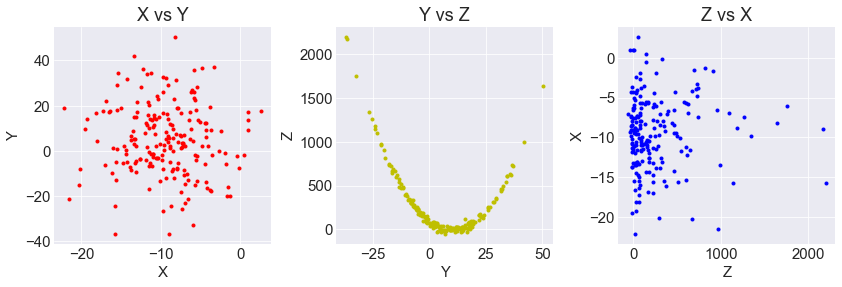

In [5]:
plt.figure(figsize=(14,4))

plt.subplot(1, 3, 1)
plt.plot(plotLab[:,0],plotLab[:,1], 'r.')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('X vs Y')

plt.subplot(1, 3, 2)
plt.plot(plotLab[:,1],plotLab[:,2], 'y.')
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('Y vs Z')

plt.subplot(1, 3, 3)
plt.plot(plotLab[:,2],plotLab[:,0], 'b.')
plt.xlabel('Z')
plt.ylabel('X')
plt.title('Z vs X')

plt.subplots_adjust(wspace = 0.3, hspace = 0.01)

plt.show()

### 1c) Prepare data for transformation matrices
We need to add a column of 1s to our dataset.
1. Create a matrix of ones of the correct dimensions. [numpy.ones](hhttps://numpy.org/doc/1.18/reference/generated/numpy.ones.html)
2. Add the new column to the imported data. [numpy.hstack](https://numpy.org/doc/1.18/reference/generated/numpy.hstack.html)


In [6]:
ones = np.ones((200,1))
plotLab_h = np.hstack((plotLab, ones))
plotLab_h

array([[  -1.878,   -1.013,   73.627,    1.   ],
       [ -13.059,   17.36 ,   41.08 ,    1.   ],
       [ -12.641,   -3.435,  174.669,    1.   ],
       [ -15.365,   34.323,  607.439,    1.   ],
       [  -5.673,  -14.979,  598.393,    1.   ],
       [ -21.508,  -21.41 ,  973.77 ,    1.   ],
       [  -1.276,  -19.761,  817.145,    1.   ],
       [ -13.806,   -8.358,  301.274,    1.   ],
       [  -8.405,  -11.787,  470.952,    1.   ],
       [ -11.247,   34.341,  605.098,    1.   ],
       [  -2.689,    0.103,   75.917,    1.   ],
       [ -20.301,  -15.14 ,  668.435,    1.   ],
       [ -11.612,   21.716,  166.265,    1.   ],
       [ -11.92 ,   -3.798,  173.865,    1.   ],
       [  -4.331,  -13.553,  479.397,    1.   ],
       [ -15.499,   18.138,    6.781,    1.   ],
       [ -10.862,   14.35 ,  -15.52 ,    1.   ],
       [ -14.389,   -1.524,  145.707,    1.   ],
       [  -9.789,   26.113,  252.389,    1.   ],
       [  -7.086,    6.937,  -57.971,    1.   ],
       [ -15.503,   

## Task 2: Translation

### 2a) Create the Translation Matrix

<img src="img/Translation-Matrix2.png" align="right"/>

<i>Image: Example of translation matrix multiplied with a vector</i>

1. Design a transformation matrix that translates the dataset
  - +25 units in the Y direction  (t<sub>y</sub>)
  - -1000 units in the Z direction (t<sub>z</sub>)
  - Identity Matrix: [eye](https://numpy.org/doc/1.18/reference/generated/numpy.eye.html)
  - Print your matrix


In [7]:
translateMatrix = np.array([[1, 0, 0, 0],
                            [0, 1, 0, 25],
                            [0, 0, 1, -1000],
                            [0, 0, 0, 1]])
print(translateMatrix)

[[    1     0     0     0]
 [    0     1     0    25]
 [    0     0     1 -1000]
 [    0     0     0     1]]


### 2b) Translate Data and Visualize Results

2. Multiply your transformation matrix with the dataset using matrix multiplication and transposed matrices
  - m @ n or [matmul](https://numpy.org/doc/1.18/reference/generated/numpy.matmul.html) 
  - [transpose](https://numpy.org/doc/1.18/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T)
3. Create a figure with 3 subplots, graph the original data and translated results for all 3 possible pairs of axes. Each subplot should have 2 datasets graphed on it, the original data and the translated data in different colors.
  - <i>You can implement this as a function. You'll be repeating this visualization with different transformation matrices.</i>
  - Each subplot should have a title
  - The plot should include a legend labeling which color is which dataset.

In [8]:
matmul_T = (translateMatrix @ plotLab_h.T).T
print(matmul_T)

[[   -1.878    23.987  -926.373     1.   ]
 [  -13.059    42.36   -958.92      1.   ]
 [  -12.641    21.565  -825.331     1.   ]
 [  -15.365    59.323  -392.561     1.   ]
 [   -5.673    10.021  -401.607     1.   ]
 [  -21.508     3.59    -26.23      1.   ]
 [   -1.276     5.239  -182.855     1.   ]
 [  -13.806    16.642  -698.726     1.   ]
 [   -8.405    13.213  -529.048     1.   ]
 [  -11.247    59.341  -394.902     1.   ]
 [   -2.689    25.103  -924.083     1.   ]
 [  -20.301     9.86   -331.565     1.   ]
 [  -11.612    46.716  -833.735     1.   ]
 [  -11.92     21.202  -826.135     1.   ]
 [   -4.331    11.447  -520.603     1.   ]
 [  -15.499    43.138  -993.219     1.   ]
 [  -10.862    39.35  -1015.52      1.   ]
 [  -14.389    23.476  -854.293     1.   ]
 [   -9.789    51.113  -747.611     1.   ]
 [   -7.086    31.937 -1057.971     1.   ]
 [  -15.503    54.254  -649.993     1.   ]
 [   -4.276    37.541  -968.209     1.   ]
 [   -5.492    53.382  -686.469     1.   ]
 [   -7.488

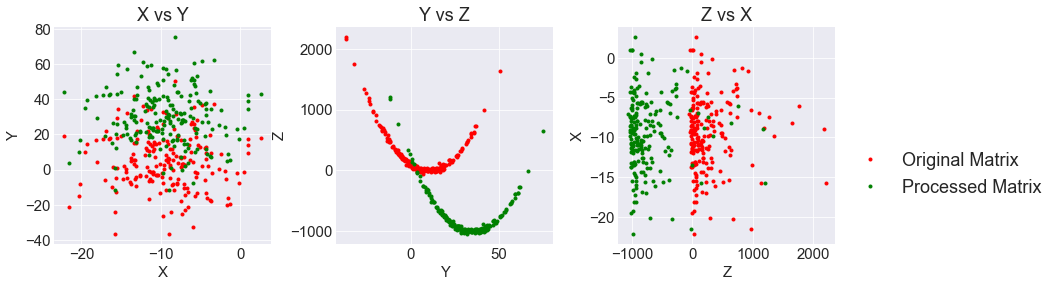

In [13]:
def plot_sets(originalMatrix = '', processedMatrix = ''):
    plt.figure(figsize=(14,4), constrained_layout=False)
    
    plt.subplot(1, 3, 1) # plot x-y
    plt.plot(originalMatrix[:,0],originalMatrix[:,1], 'r.')
    plt.plot(processedMatrix[:,0],processedMatrix[:,1], 'g.')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('X vs Y')
        
    plt.subplot(1, 3, 2) # plot y-z
    plt.plot(originalMatrix[:,1],originalMatrix[:,2], 'r.')
    plt.plot(processedMatrix[:,1],processedMatrix[:,2], 'g.')
    plt.xlabel('Y')
    plt.ylabel('Z')
    plt.title('Y vs Z')

    plt.subplot(1, 3, 3) # plot z-x
    plt.plot(originalMatrix[:,2],originalMatrix[:,0], 'r.')

    plt.xlabel('Z')
    plt.ylabel('X')
    plt.title('Z vs X')
    plt.plot(processedMatrix[:,2],processedMatrix[:,0], 'g.')
    plt.subplots_adjust(wspace = 0.3, hspace = 0.01)
    plt.legend(('Original Matrix', 'Processed Matrix'), fontsize = 18, bbox_to_anchor=(1, 0.5))
    plt.show()
    
plot_sets(originalMatrix = plotLab_h,processedMatrix = matmul_T)



## Task 3: Scale

### 3a) Create a Scaling Matrix

<img src="img/Scaling-Matrix2.png" align="right"/>

<i>Image: Example of translation matrix multiplied with a vector</i>

1. Design a transformation matrix that scales the dataset
  - by 3 in the X axis
  - by 0.1 in the Z axis
  - Identity Matrix: [eye](https://numpy.org/doc/1.18/reference/generated/numpy.eye.html)
  - Print the matrix

In [10]:
scalingMatrix = np.array([[3, 0, 0, 0],
                            [0, 1, 0, 0],
                            [0, 0, 0.1, 0],
                            [0, 0, 0, 1]])
print(scalingMatrix)

[[3.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.  0.1 0. ]
 [0.  0.  0.  1. ]]


### 3b) Scale Data and Visualize the Results

2. Multiply your transformation matrix with the dataset using matrix multiplication and transposed matrices
  - m @ n or [matmul](https://numpy.org/doc/1.18/reference/generated/numpy.matmul.html) 
  - [transpose](https://numpy.org/doc/1.18/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T)
3. Create a figure with 3 subplots, graph the original data and scaled results for all 3 possible pairs of axes. Each subplot should have 2 datasets graphed on it, the original data and the scaled data in different colors.
  - <i>If you implemented a function in the previous step, you can use it here.</i>
  - Each subplot should have a title
  - The plot should include a legend labeling which color is which dataset.

In [11]:
matmul_S = (scalingMatrix @ plotLab_h.T).T
print(matmul_S)

[[ -5.634   -1.013    7.3627   1.    ]
 [-39.177   17.36     4.108    1.    ]
 [-37.923   -3.435   17.4669   1.    ]
 [-46.095   34.323   60.7439   1.    ]
 [-17.019  -14.979   59.8393   1.    ]
 [-64.524  -21.41    97.377    1.    ]
 [ -3.828  -19.761   81.7145   1.    ]
 [-41.418   -8.358   30.1274   1.    ]
 [-25.215  -11.787   47.0952   1.    ]
 [-33.741   34.341   60.5098   1.    ]
 [ -8.067    0.103    7.5917   1.    ]
 [-60.903  -15.14    66.8435   1.    ]
 [-34.836   21.716   16.6265   1.    ]
 [-35.76    -3.798   17.3865   1.    ]
 [-12.993  -13.553   47.9397   1.    ]
 [-46.497   18.138    0.6781   1.    ]
 [-32.586   14.35    -1.552    1.    ]
 [-43.167   -1.524   14.5707   1.    ]
 [-29.367   26.113   25.2389   1.    ]
 [-21.258    6.937   -5.7971   1.    ]
 [-46.509   29.254   35.0007   1.    ]
 [-12.828   12.541    3.1791   1.    ]
 [-16.476   28.382   31.3531   1.    ]
 [-22.464    6.641   -2.2467   1.    ]
 [-16.488  -13.296   57.9077   1.    ]
 [-40.257   41.741   99.3

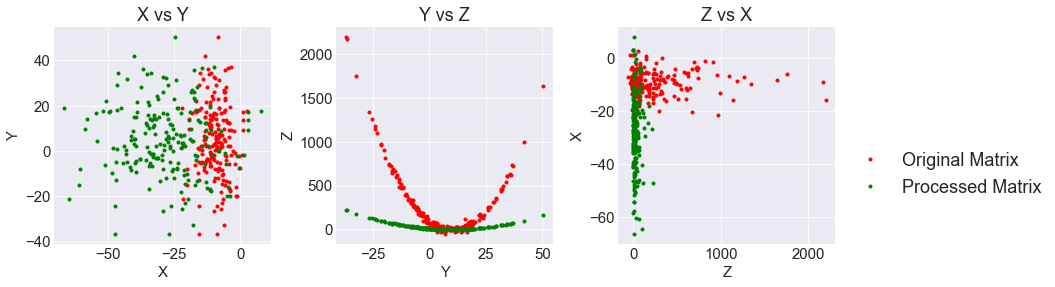

In [12]:
plot_sets(originalMatrix = plotLab_h,processedMatrix = matmul_S)